In [1]:
%reload_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import os
import baobap as bao
import networkx as nx

In [11]:
from src.analysis import detect_clusters

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
%matplotlib notebook

In [13]:
# use the same colours as in the phase space plot
cmap = plt.get_cmap("Accent")
bounds = [-1, 0, 1, 2, 3]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

In [14]:
matplotlib.style.use("ggplot") # fivethirtyeight
matplotlib.rc('ytick', **{'labelsize': 20})
matplotlib.rc('xtick', **{'labelsize': 20}) 
matplotlib.rc('axes', **{'linewidth': 1, 'edgecolor': 'k'})

In [18]:
# simulation data
simdir = "simulation_data/resubmission/northern/cp_1_PK_0p056_D2KH_0p010/"
result_file = os.path.join(simdir, "results_ASBS.hdf")
af = bao.load_field_from_results(result_file, "asymptotic_frequencies")
_, ana = bao.load_state_for_analysis(os.path.join(simdir, "analysis.p"))

# number of nodes
n = ana[3].system_size
# range of phase shift \alpha
alphas = ana[1]
  
g = nx.Graph(np.abs(ana[3].phase_coupling))
g.remove_edges_from(nx.selfloop_edges(g))


In [19]:
def omega_sol(run):
    return (ana[3].input_power / ana[3].damping_coupling) 

In [20]:
run = 48 # alpha=0.24

for b in range(af.shape[0]):
    erg = detect_clusters(af[b, run, :])
    idx = np.argsort(erg[1])
    
    if np.isnan(erg[3]):    
        if erg[0] == 1:
            out = "sync"
        else:
            if sum(erg[1][idx][:erg[0]-1]) == erg[0]-1:
                out = "{}-soli".format(erg[0]-1)
            else:
                out = "other"
    else:
        if erg[2][idx][0] / ana[3].input_power[erg[3]] < 0:
            out = "exotic"
        else:
            out = "soli"
            
    print(b, out, erg[:2])

0 sync (1, array([236]))
1 sync (1, array([236]))
2 exotic (2, array([235,   1]))
3 sync (1, array([236]))
4 sync (1, array([236]))
5 sync (1, array([236]))
6 other (8, array([224,   2,   1,   3,   1,   3,   1,   1]))
7 sync (1, array([236]))
8 sync (1, array([236]))
9 sync (1, array([236]))
10 soli (2, array([235,   1]))
11 other (3, array([231,   4,   1]))
12 sync (1, array([236]))
13 sync (1, array([236]))
14 sync (1, array([236]))
15 sync (1, array([236]))
16 other (40, array([162,   1,   1,   1,   1,   2,   1,   4,   2,   1,   2,   3,   5,
         3,   3,   2,   1,   2,   3,   1,   1,   1,   1,   1,   1,   1,
         4,   2,   1,   2,   4,   1,   1,   2,   1,   1,   1,   5,   1,
         3]))
17 other (3, array([233,   1,   2]))
18 sync (1, array([236]))
19 sync (1, array([236]))
20 sync (1, array([236]))
21 sync (1, array([236]))
22 other (3, array([233,   2,   1]))
23 sync (1, array([236]))
24 sync (1, array([236]))
25 sync (1, array([236]))
26 soli (2, array([235,   1]))
27 s

242 sync (1, array([236]))
243 sync (1, array([236]))
244 sync (1, array([236]))
245 sync (1, array([236]))
246 sync (1, array([236]))
247 sync (1, array([236]))
248 exotic (2, array([235,   1]))
249 exotic (2, array([235,   1]))
250 sync (1, array([236]))
251 sync (1, array([236]))
252 3-soli (4, array([233,   1,   1,   1]))
253 sync (1, array([236]))
254 sync (1, array([236]))
255 sync (1, array([236]))
256 soli (2, array([235,   1]))
257 sync (1, array([236]))
258 sync (1, array([236]))
259 2-soli (3, array([234,   1,   1]))
260 sync (1, array([236]))
261 soli (2, array([235,   1]))
262 soli (2, array([235,   1]))
263 sync (1, array([236]))
264 sync (1, array([236]))
265 sync (1, array([236]))
266 soli (2, array([235,   1]))
267 soli (2, array([235,   1]))
268 sync (1, array([236]))
269 sync (1, array([236]))
270 other (17, array([210,   1,   1,   2,   2,   2,   6,   1,   1,   1,   1,   1,   1,
         2,   2,   1,   1]))
271 sync (1, array([236]))
272 sync (1, array([236]))
273 so

631 sync (1, array([236]))
632 other (72, array([20,  1,  1,  3,  3,  4,  1,  2,  1, 11,  1,  2,  2,  1,  1,  1,  3,
        2,  2,  2,  2,  8,  5,  1,  1,  4,  1,  1,  3,  3,  3,  1,  6,  2,
        1,  2,  3, 12,  4,  7,  3,  1,  2,  2,  3,  3,  1,  5,  1,  1,  1,
        1,  2,  3,  2,  1,  6,  2,  1,  2,  3,  1,  2,  1,  2,  1,  2,  4,
       40,  1,  1,  1]))
633 sync (1, array([236]))
634 sync (1, array([236]))
635 sync (1, array([236]))
636 soli (2, array([235,   1]))
637 exotic (2, array([235,   1]))
638 sync (1, array([236]))
639 sync (1, array([236]))
640 sync (1, array([236]))
641 sync (1, array([236]))
642 sync (1, array([236]))
643 sync (1, array([236]))
644 sync (1, array([236]))
645 other (3, array([233,   2,   1]))
646 sync (1, array([236]))
647 sync (1, array([236]))
648 sync (1, array([236]))
649 2-soli (3, array([234,   1,   1]))
650 sync (1, array([236]))
651 sync (1, array([236]))
652 sync (1, array([236]))
653 sync (1, array([236]))
654 sync (1, array([236]))
655 

897 sync (1, array([236]))
898 sync (1, array([236]))
899 sync (1, array([236]))
900 other (22, array([202,   1,   4,   3,   1,   2,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   3,   1,   5,   1]))
901 sync (1, array([236]))
902 sync (1, array([236]))
903 sync (1, array([236]))
904 sync (1, array([236]))
905 sync (1, array([236]))
906 sync (1, array([236]))
907 soli (2, array([235,   1]))
908 sync (1, array([236]))
909 sync (1, array([236]))
910 other (9, array([222,   2,   1,   1,   1,   2,   4,   1,   2]))
911 sync (1, array([236]))
912 sync (1, array([236]))
913 sync (1, array([236]))
914 soli (2, array([235,   1]))
915 sync (1, array([236]))
916 sync (1, array([236]))
917 sync (1, array([236]))
918 sync (1, array([236]))
919 2-soli (3, array([234,   1,   1]))
920 soli (2, array([235,   1]))
921 soli (2, array([235,   1]))
922 sync (1, array([236]))
923 sync (1, array([236]))
924 sync (1, array([236]))
925 soli (2, array([235,   1]))
926 sync (1, array([236])

In [21]:
def markers(a):
    out = "o"
    if a < 0:
        out = "s"
    return out

<IPython.core.display.Javascript object>


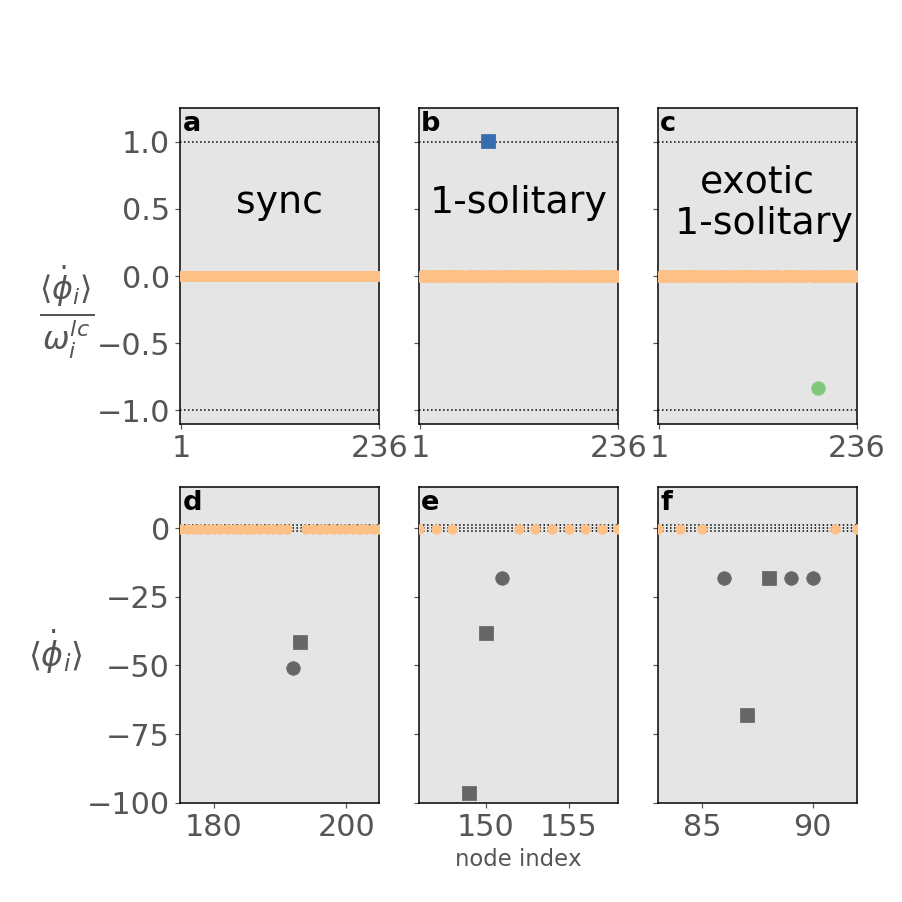

[[  -1.         -100.34236735]]
[[  1.         -83.31880995]]
[[  1.         -50.92612737]
 [ -1.         -41.5930524 ]]
[[ -1.         -96.45975749]
 [ -1.         -38.02228053]
 [  1.         -18.03131931]]
[86 87 88 89 90]


In [42]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=False, 
                             gridspec_kw={"wspace":0.2, "hspace": 0.2, "left": 0.2, "right":0.95})
labels = ["a", "b", "c", "d", "e", "f"]
cases = ["sync", "1-solitary", "exotic\n 1-solitary", "", "", ""]

fig1.set_size_inches(8.27, 8.27)

scale = 0.1 # scale solitary for sketch

counter = 0
for row in f1_axes:
    for ax in row:
        ax.set_xlim(0, n-1)
        ax.set_ylim(-1.1, 1.25)
        ax.text(0.01, 0.99, labels[counter], ha='left', va='top', fontsize=18, weight='bold', transform=ax.transAxes, zorder=10)
        ax.text(0.5, 0.7, cases[counter], ha='center', va='center', fontsize=25, transform=ax.transAxes, zorder=10)
        ax.axhline(1, 0, n-1, c="k", linestyle=":", linewidth=1)
        ax.axhline(0, 0, n-1, c="k", linestyle=":", linewidth=1)
        ax.axhline(-1, 0, n-1, c="k", linestyle=":", linewidth=1)
        ax.grid(False)
        ax.xaxis.set_visible(True)
        counter += 1

# sync
batch = 0
sync = af[batch, run, :] * scale / omega_sol(run) 

f1_axes[0, 0].scatter(range(n), sync, zorder=10, s=40, c=[cmap(norm(0))])
f1_axes[0, 0].set_xticks([1, 236])

# normal solitary
batch = 10 
soli = af[batch, run, :] * scale / omega_sol(run) 

f1_axes[0, 1].scatter(range(n), soli, zorder=10, s=40, c=[cmap(norm(0))])
idx = np.where(np.abs(soli) > .5)[0]
print(np.c_[ana[3].input_power[idx], af[batch, run, idx]])
f1_axes[0, 1].scatter(idx, soli[idx], zorder=10, s=80, c=[cmap(norm(1))], marker=markers(ana[3].input_power[idx]))
f1_axes[0, 1].set_xticks([1, 236])
f1_axes[0, 1].set_yticklabels([])


# exotic solitary
batch = 2 
exotic = af[batch, run, :] * scale / omega_sol(run) 

f1_axes[0, 2].scatter(range(n), exotic, zorder=10, s=40, c=[cmap(norm(0))])
idx = np.where(np.abs(exotic) > .5)[0]
print(np.c_[ana[3].input_power[idx], af[batch, run, idx]])
f1_axes[0, 2].scatter(idx, exotic[idx], zorder=10, s=80, c=[cmap(norm(-1))], marker=markers(ana[3].input_power[idx]))
f1_axes[0, 2].set_xticks([1, 236])
f1_axes[0, 2].set_yticklabels([])


# multisol
batch = 119 
multisol_d = af[batch, run, :]

f1_axes[1, 0].scatter(range(n), multisol_d, zorder=10, s=40, c=[cmap(norm(0))])
idx = np.where(np.abs(multisol_d) > .5)[0]
for i in idx:
    f1_axes[1, 0].scatter(i, multisol_d[i], zorder=10, s=80, c=[cmap(norm(2))], marker=markers(ana[3].input_power[i]))
print(np.c_[ana[3].input_power[idx], af[batch, run, idx]])
f1_axes[1, 0].set_xlim(175, 205)

# multisol
batch = 117 
multisol_e = af[batch, run, :] 

f1_axes[1, 1].scatter(range(n), multisol_e, zorder=10, s=40, c=[cmap(norm(0))])
idx = np.where(np.abs(multisol_e) > .5)[0]
print(np.c_[ana[3].input_power[idx], af[batch, run, idx]])
for i in idx:
    f1_axes[1, 1].scatter(i, multisol_e[i], zorder=10, s=80, c=[cmap(norm(2))], marker=markers(ana[3].input_power[i]))
f1_axes[1, 1].set_xlim(146, 158)
f1_axes[1, 1].set_yticklabels([])

# multisol
batch = 11 
multisol_f = af[batch, run, :] 

f1_axes[1, 2].scatter(range(n), multisol_f, zorder=10, s=40, c=[cmap(norm(0))])
idx = np.where(np.abs(multisol_f) > .5)[0]
print(idx)
for i in idx:
    f1_axes[1, 2].scatter(i, multisol_f[i], zorder=10, s=80, c=[cmap(norm(2))], marker=markers(ana[3].input_power[i]))
f1_axes[1, 2].set_xlim(83, 92)
f1_axes[1, 2].set_yticklabels([])


for i in range(3):
    f1_axes[1, i].set_ylim(-100, 15)
        
f1_axes[1, 1].set_xlabel("node index", fontsize=15)
f1_axes[0, 0].set_ylabel(r"$\frac{\langle\dot\phi_i\rangle}{\omega^{lc}_i}$", rotation=0, fontsize=30, labelpad=20, position=(-0.15, 0.2))
f1_axes[1, 0].set_ylabel(r"$\langle\dot\phi_i\rangle$", rotation=0, fontsize=22, labelpad=21, position=(-0.15, 0.4))


plt.savefig("figures/fig1.pdf", facecolor="w", bbox_inches = 'tight', pad_inches = 0)